## 逻辑回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 预测函数

In [2]:
# sigmod预测函数
def sigmoid(z):
    return 1/(1+np.exp(-1*z))
def compute_forecast(x,theta):
    return sigmoid(x*theta.T)
sigmoid(1),compute_forecast(np.matrix([[1,1],[1,2],[1,3]]),np.matrix([1,2]))

(0.7310585786300049,
 matrix([[0.95257413],
         [0.99330715],
         [0.99908895]]))

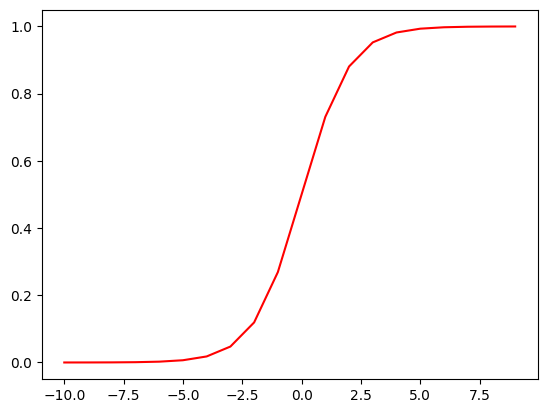

In [3]:
x=np.arange(-10,10,step=1)
plt.plot(x,sigmoid(x),'r')
plt.show()

### 代价函数

In [4]:
def compute_cost(x,y,theta):
    inner1=np.multiply(-y, np.log(sigmoid(compute_forecast(x,theta))))
    inner2=np.multiply((1 - y), np.log(1 - sigmoid(compute_forecast(x,theta))))
    inner=inner1-inner2
    return np.sum(inner)/len(x)

### 梯度下降

In [5]:
def gradient_descent(x,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        tmp1=compute_forecast(x,theta)-y
        for j in range(parameters):
            tmp2=np.multiply(tmp1,x[:,j])
            temp[0,j]=temp[0,j]-alpha/len(x)*np.sum(tmp2)
        theta=temp
        cost[i]=compute_cost(x,y,theta)
    return theta,cost

### 读取数据集

In [6]:
data=pd.read_csv('./ex2data1.txt',names=['a','b','c'])
data.head(),data.describe()

(           a          b  c
 0  34.623660  78.024693  0
 1  30.286711  43.894998  0
 2  35.847409  72.902198  0
 3  60.182599  86.308552  1
 4  79.032736  75.344376  1,
                 a           b           c
 count  100.000000  100.000000  100.000000
 mean    65.644274   66.221998    0.600000
 std     19.458222   18.582783    0.492366
 min     30.058822   30.603263    0.000000
 25%     50.919511   48.179205    0.000000
 50%     67.032988   67.682381    1.000000
 75%     80.212529   79.360605    1.000000
 max     99.827858   98.869436    1.000000)

### 数据展示

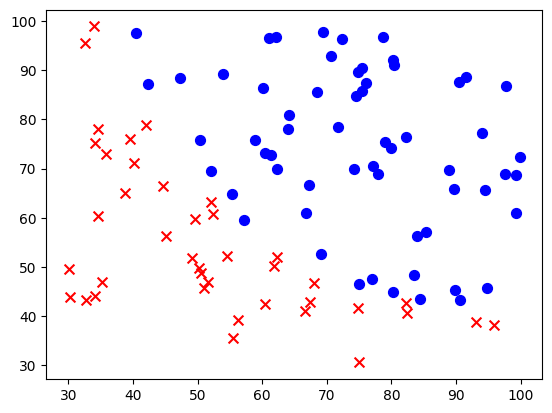

In [7]:
positive=data[data['c'].isin([1])]
negative=data[data['c'].isin([0])]
fig, ax = plt.subplots()
ax.scatter(positive['a'], positive['b'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['a'], negative['b'], s=50, c='r', marker='x', label='Rejected')
plt.show()

### 均值归一化

In [8]:
data=(data-data.mean())/data.max()
# 插入特殊列
data.insert(0,'#',1)
data.head(),data.describe()

(   #         a         b    c
 0  1 -0.310741  0.119377 -0.6
 1  1 -0.354185 -0.225823 -0.6
 2  1 -0.298482  0.067566 -0.6
 3  1 -0.054711  0.203162  0.4
 4  1  0.134115  0.092267  0.4,
            #             a             b             c
 count  100.0  1.000000e+02  1.000000e+02  1.000000e+02
 mean     1.0 -1.304512e-17  2.114975e-16  1.665335e-17
 std      0.0  1.949178e-01  1.879528e-01  4.923660e-01
 min      1.0 -3.564681e-01 -3.602603e-01 -6.000000e-01
 25%      1.0 -1.475015e-01 -1.824911e-01 -6.000000e-01
 50%      1.0  1.391109e-02  1.477083e-02  4.000000e-01
 75%      1.0  1.459338e-01  1.328885e-01  4.000000e-01
 max      1.0  3.424253e-01  3.302076e-01  4.000000e-01)

### 初始化数据

In [9]:
cols=data.shape[1]
x=data.iloc[:,:cols-1]
y=data.iloc[:,cols-1:cols]
x_matrix=np.matrix(x.values)
y_matrix=np.matrix(y.values)
theta=np.matrix(np.zeros(cols-1))
alpha=0.03
iters=3000
x_matrix.shape,y_matrix.shape,theta.shape

((100, 3), (100, 1), (1, 3))

In [10]:
g,cost=gradient_descent(x_matrix,y_matrix,theta,alpha,iters)
g

matrix([[-4.68721542,  4.73220896,  4.0790781 ]])

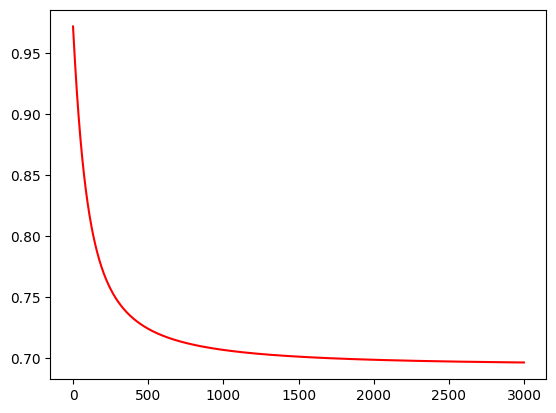

In [11]:
fig, ax = plt.subplots()
ax.plot(np.arange(iters), cost, 'r')
plt.show()